# Data Preparation
This section covers the initial data processing steps including data loading, cleaning, and preliminary analysis.
Navigate: [Next (Model Development)](02_model_development.ipynb)

In [1]:
#Mental health classification
import pandas as pd
import numpy as np

df = pd.read_csv('mental_health.csv')
print(df.head(5))

   Are you self-employed?  \
0                       0   
1                       0   
2                       0   
3                       1   
4                       0   

  How many employees does your company or organization have?  \
0                                             26-100           
1                                               6-25           
2                                               6-25           
3                                                NaN           
4                                               6-25           

   Is your employer primarily a tech company/organization?  \
0                                                1.0         
1                                                1.0         
2                                                1.0         
3                                                NaN         
4                                                0.0         

   Is your primary role within your company related to tech/IT?  \


In [2]:
#Preprocessing
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer

class Missing:
    def __init__(self, features, counts):
        self.features = features
        self.counts = counts
        
    def missing_feature(self, feature_type):
        print(f"\nMissing {feature_type} Features:")
        for feature, count in zip(self.features, self.counts):
            print(f"{feature}: {count} missing values")

# Read the dataset
df = pd.read_csv('mental_health.csv')

# Analyze missing values in numeric columns
features_list = [col for col in df.columns if df[col].dtype != "object" and df[col].isna().sum() > 0]
features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and df[col].dtype != "object"]

missing = Missing(features_list, features_count)
missing.missing_feature("Numeric")

# Analyze missing values in non-numeric columns
features_list = [col for col in df.columns if df[col].dtype == "object" and df[col].isna().sum() > 0]
features_count = [df[col].isna().sum() for col in df.columns if df[col].isna().sum() > 0 and df[col].dtype == "object"]

missing = Missing(features_list, features_count)
missing.missing_feature("Non-Numeric")

# Drop features with more than 60% missing values
dropped_feat = [col for col in df.columns if df[col].isna().sum() >= 0.60 * df.shape[0]]
df.drop(labels=dropped_feat, axis=1, inplace=True)
print("\nNumber of features dropped: ", len(dropped_feat))
print("Features dropped:", dropped_feat)

# Clean specific columns using SimpleImputer
num_col = ['Is your employer primarily a tech company/organization?', 'What is your gender?']

for col in num_col:
    if col in df.columns:
        # Create a copy of the column's values
        values = df[col].values
        # Reshape properly for SimpleImputer
        reshaped_values = values.reshape(-1, 1)
        # Create and fit the imputer
        smpl_num_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
        # Transform the values
        imputed_values = smpl_num_imp.fit_transform(reshaped_values)
        # Assign back to dataframe
        df[col] = imputed_values.ravel()

# Impute remaining missing values using Simple Imputer
smpl_imp = SimpleImputer(missing_values=np.nan, strategy='most_frequent')
df_imputed = pd.DataFrame(
    smpl_imp.fit_transform(df),
    columns=df.columns,
    index=df.index
)
df = df_imputed.astype(df.dtypes.to_dict())

# Keep only countries with response > 20
countries = [country for country, value in df['What country do you live in?'].value_counts().items()
            if value > 20]
df = df[df['What country do you live in?'].isin(countries)]

print("\nFinal dataset shape:", df.shape)
print("\nValue counts for countries:")
print(df['What country do you live in?'].value_counts())

# Save the cleaned dataset
df.to_csv('mental_health_cleaned_general.csv', index=False)

# Display some basic statistics
print("\nBasic statistics of the cleaned dataset:")
print(df.describe(include='all').T)


Missing Numeric Features:
Is your employer primarily a tech company/organization?: 287 missing values
Is your primary role within your company related to tech/IT?: 1170 missing values
Do you have medical coverage (private insurance or state-provided) which includes treatment of  mental health issues?: 1146 missing values

Missing Non-Numeric Features:
How many employees does your company or organization have?: 287 missing values
Does your employer provide mental health benefits as part of healthcare coverage?: 287 missing values
Do you know the options for mental health care available under your employer-provided coverage?: 420 missing values
Has your employer ever formally discussed mental health (for example, as part of a wellness campaign or other official communication)?: 287 missing values
Does your employer offer resources to learn more about mental health concerns and options for seeking help?: 287 missing values
Is your anonymity protected if you choose to take advantage of me

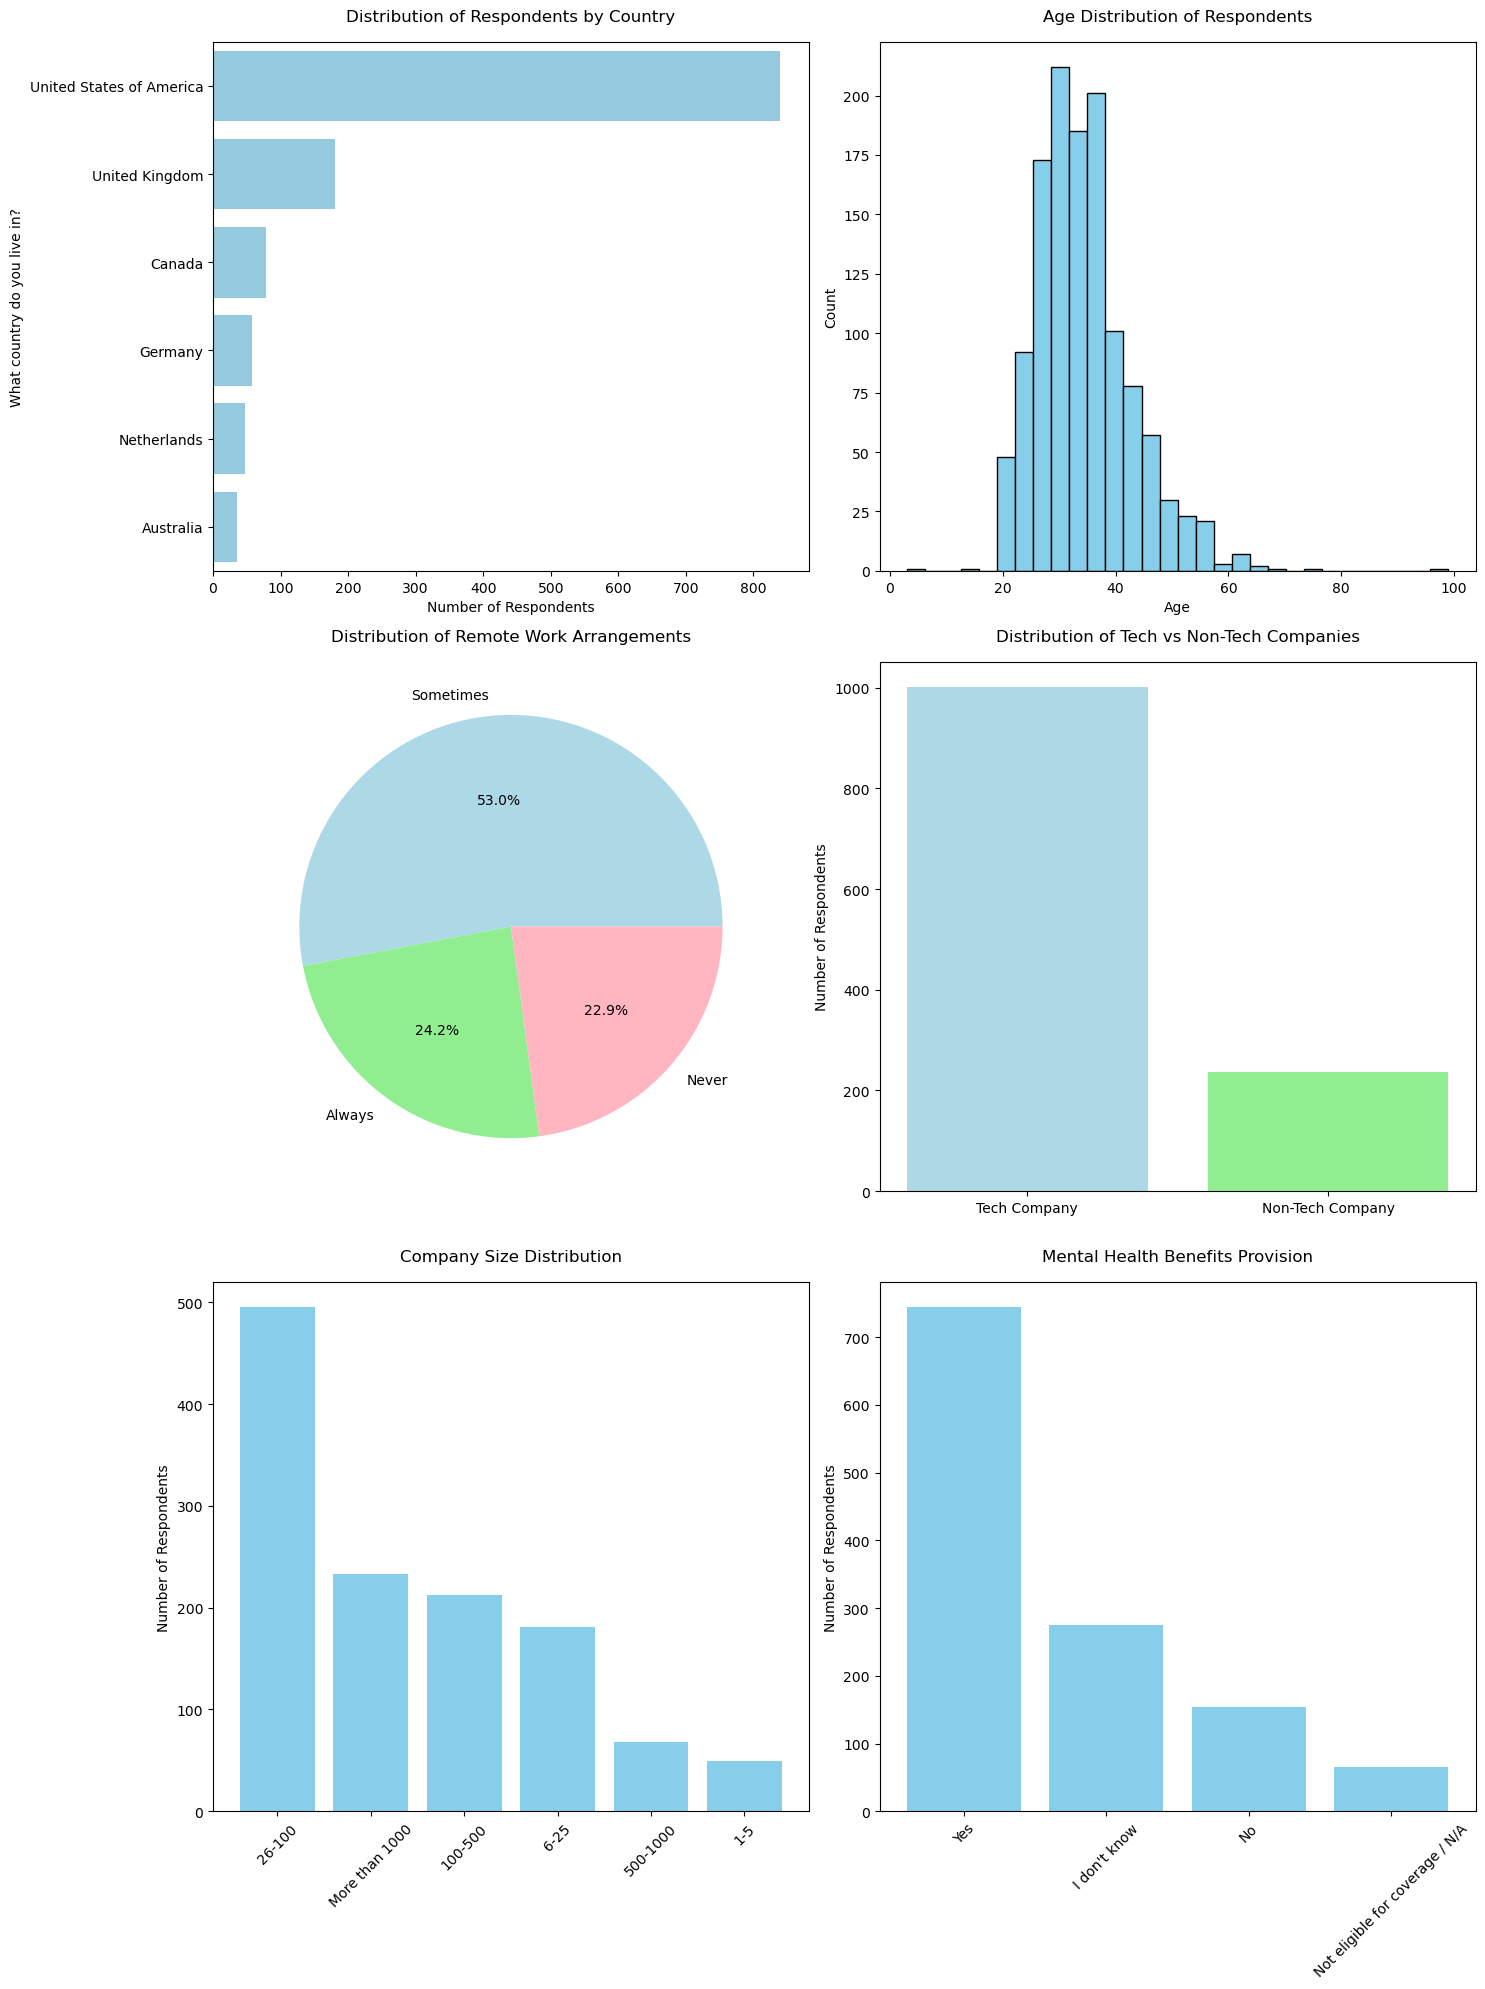

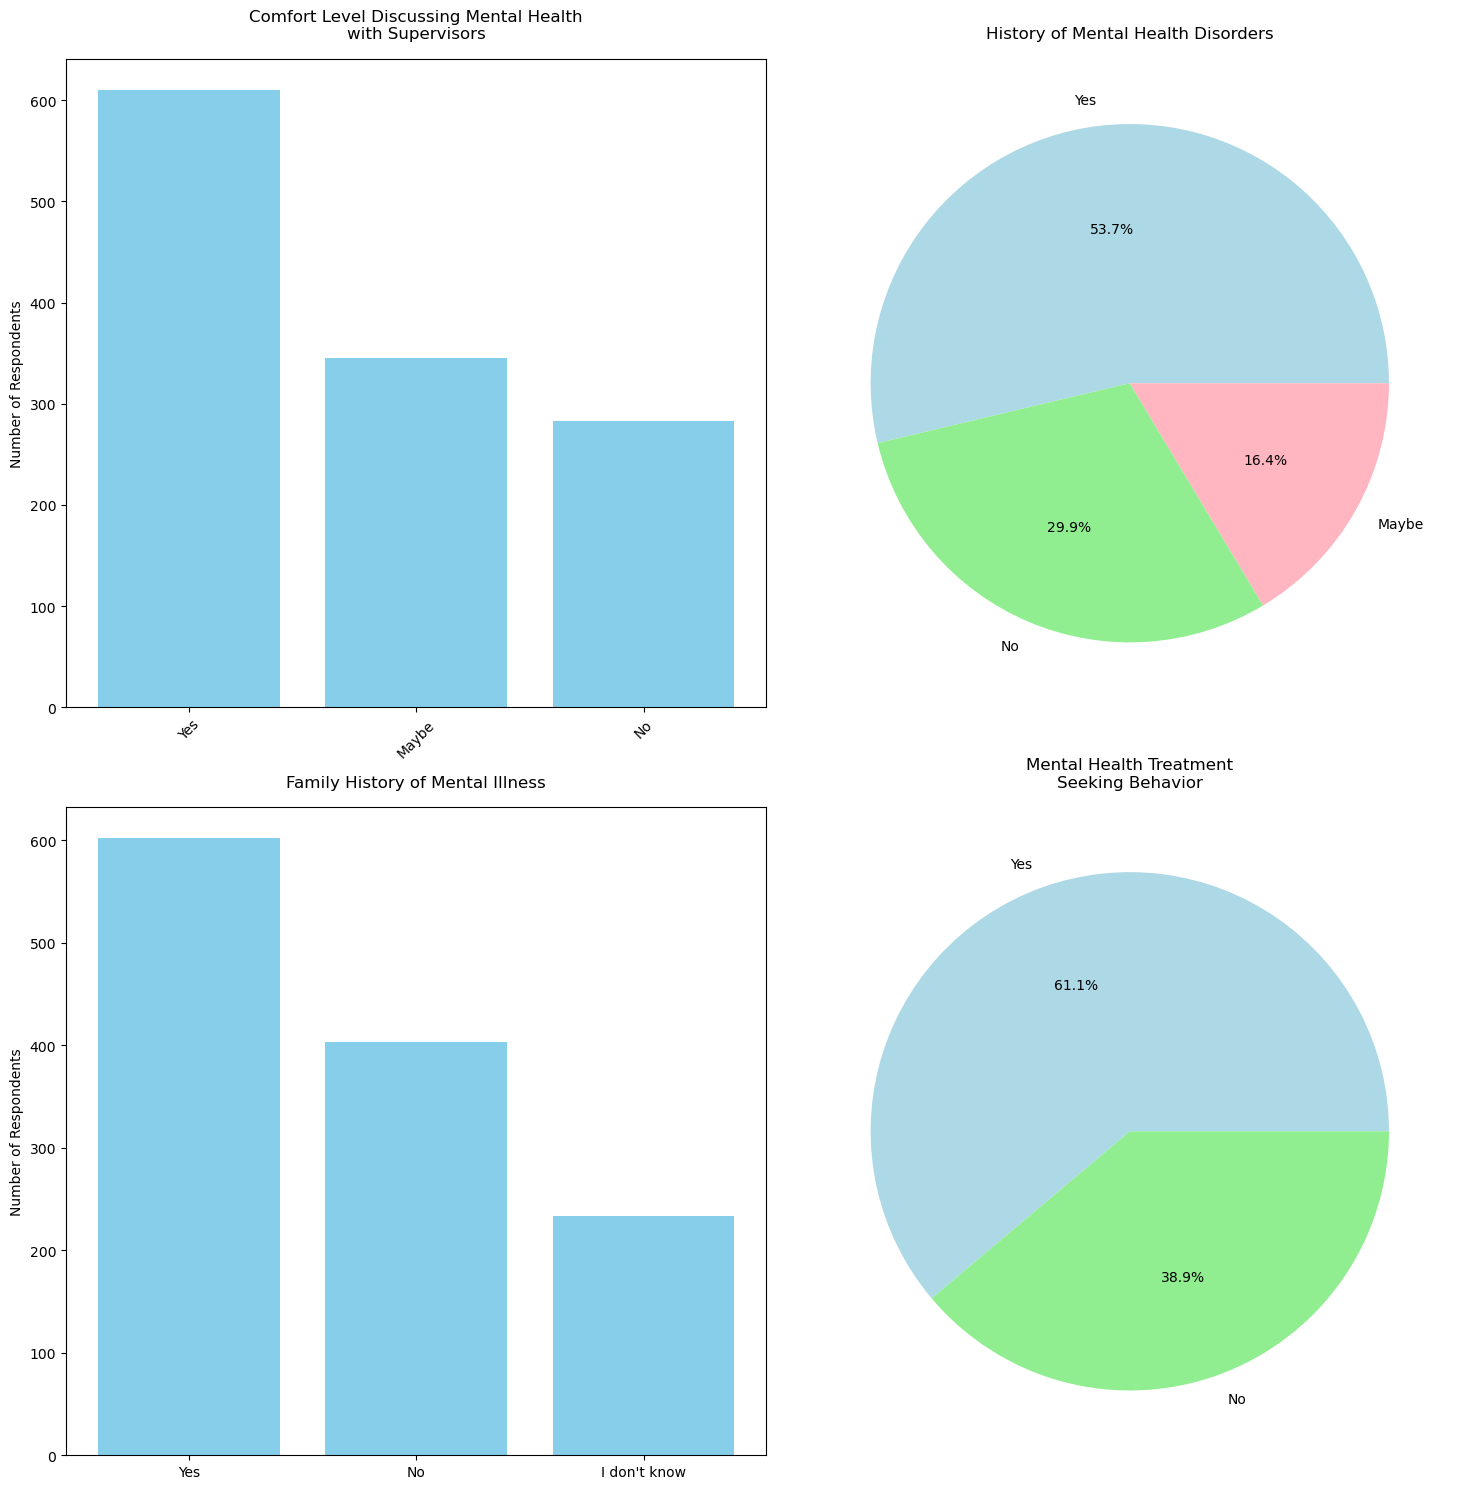

<Figure size 640x480 with 0 Axes>

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Read the cleaned data
df = pd.read_csv('mental_health_cleaned_general.csv')

# Create figure for first set of visualizations
fig = plt.figure(figsize=(15, 20))

# 1. Country Distribution
plt.subplot(3, 2, 1)
country_counts = df['What country do you live in?'].value_counts()
sns.barplot(x=country_counts.values, y=country_counts.index, color='skyblue')
plt.title('Distribution of Respondents by Country', fontsize=12, pad=15)
plt.xlabel('Number of Respondents')

# 2. Age Distribution
plt.subplot(3, 2, 2)
df['What is your age?'] = df['What is your age?'].astype(float)
# Remove outlier age of 323
df = df[df['What is your age?'] < 100]
plt.hist(df['What is your age?'], bins=30, color='skyblue', edgecolor='black')
plt.title('Age Distribution of Respondents', fontsize=12, pad=15)
plt.xlabel('Age')
plt.ylabel('Count')

# 3. Remote Work Distribution
plt.subplot(3, 2, 3)
remote_counts = df['Do you work remotely?'].value_counts()
plt.pie(remote_counts.values, labels=remote_counts.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightpink'])
plt.title('Distribution of Remote Work Arrangements', fontsize=12, pad=15)

# 4. Tech Company vs Non-Tech Company
plt.subplot(3, 2, 4)
tech_counts = df['Is your employer primarily a tech company/organization?'].value_counts()
plt.bar(['Tech Company', 'Non-Tech Company'], tech_counts.values, color=['lightblue', 'lightgreen'])
plt.title('Distribution of Tech vs Non-Tech Companies', fontsize=12, pad=15)
plt.ylabel('Number of Respondents')

# 5. Company Size Distribution
plt.subplot(3, 2, 5)
size_counts = df['How many employees does your company or organization have?'].value_counts()
plt.bar(size_counts.index, size_counts.values, color='skyblue')
plt.title('Company Size Distribution', fontsize=12, pad=15)
plt.xticks(rotation=45)
plt.ylabel('Number of Respondents')

# 6. Mental Health Benefits Provision
plt.subplot(3, 2, 6)
benefits_counts = df['Does your employer provide mental health benefits as part of healthcare coverage?'].value_counts()
plt.bar(benefits_counts.index, benefits_counts.values, color='skyblue')
plt.title('Mental Health Benefits Provision', fontsize=12, pad=15)
plt.xticks(rotation=45)
plt.ylabel('Number of Respondents')

plt.tight_layout()
plt.show()

# Create figure for second set of visualizations
fig = plt.figure(figsize=(15, 15))

# 7. Comfort Level with Supervisors
plt.subplot(2, 2, 1)
comfort_sup = df['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'].value_counts()
plt.bar(comfort_sup.index, comfort_sup.values, color='skyblue')
plt.title('Comfort Level Discussing Mental Health\nwith Supervisors', fontsize=12, pad=15)
plt.xticks(rotation=45)
plt.ylabel('Number of Respondents')

# 8. Previous Mental Health History
plt.subplot(2, 2, 2)
history = df['Have you had a mental health disorder in the past?'].value_counts()
plt.pie(history.values, labels=history.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen', 'lightpink'])
plt.title('History of Mental Health Disorders', fontsize=12, pad=15)

# 9. Family History of Mental Illness
plt.subplot(2, 2, 3)
family_history = df['Do you have a family history of mental illness?'].value_counts()
plt.bar(family_history.index, family_history.values, color='skyblue')
plt.title('Family History of Mental Illness', fontsize=12, pad=15)
plt.ylabel('Number of Respondents')

# 10. Treatment Seeking Behavior
plt.subplot(2, 2, 4)
treatment = df['Have you ever sought treatment for a mental health issue from a mental health professional?'].map({0: 'No', 1: 'Yes'}).value_counts()
plt.pie(treatment.values, labels=treatment.index, autopct='%1.1f%%', colors=['lightblue', 'lightgreen'])
plt.title('Mental Health Treatment\nSeeking Behavior', fontsize=12, pad=15)

plt.tight_layout()
plt.show()

# Save the figures
plt.savefig('mental_health_survey_analysis.png')

In [4]:
import sqlite3

try:
    # Create a new database
    conn = sqlite3.connect('mental_health_final.db')
    print("Database 'mental_health_final.db' created successfully!")
    
    # Close the connection
    conn.close()
    
except sqlite3.Error as e:
    print(f"Error creating database: {e}")

Database 'mental_health_final.db' created successfully!


In [5]:
#Normalize DB into 3NF
import sqlite3
import pandas as pd

# Read the cleaned data
df = pd.read_csv('mental_health_cleaned_general.csv')

try:
    # Create a new database connection
    conn = sqlite3.connect('mental_health_final.db')
    cursor = conn.cursor()
    
    # Create Employees table (Main entity)
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS employees (
        employee_id INTEGER PRIMARY KEY AUTOINCREMENT,
        age INTEGER,
        gender TEXT,
        country TEXT,
        state TEXT,
        is_self_employed INTEGER
    )
    ''')
    
    # Create Employment table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS employment (
        employment_id INTEGER PRIMARY KEY AUTOINCREMENT,
        employee_id INTEGER,
        company_size TEXT,
        is_tech_company INTEGER,
        work_remotely TEXT,
        FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
    )
    ''')
    
    # Create Mental Health Benefits table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS mental_health_benefits (
        benefit_id INTEGER PRIMARY KEY AUTOINCREMENT,
        employee_id INTEGER,
        has_mental_health_benefits TEXT,
        knows_benefits_options TEXT,
        mental_health_resources TEXT,
        leave_request_ease TEXT,
        FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
    )
    ''')

    # Create Mental Health History table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS mental_health_history (
        history_id INTEGER PRIMARY KEY AUTOINCREMENT,
        employee_id INTEGER,
        family_history TEXT,
        past_disorder TEXT,
        current_disorder TEXT,
        sought_treatment INTEGER,
        FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
    )
    ''')

    # Create Workplace Communication table
    cursor.execute('''
    CREATE TABLE IF NOT EXISTS workplace_communication (
        communication_id INTEGER PRIMARY KEY AUTOINCREMENT,
        employee_id INTEGER,
        discuss_with_supervisor TEXT,
        discuss_with_coworkers TEXT,
        observed_negative_consequences TEXT,
        interferes_with_work TEXT,
        FOREIGN KEY (employee_id) REFERENCES employees(employee_id)
    )
    ''')
    
    # Insert data into Employees table
    for _, row in df.iterrows():
        cursor.execute('''
        INSERT INTO employees (age, gender, country, state, is_self_employed)
        VALUES (?, ?, ?, ?, ?)
        ''', (
            row['What is your age?'],
            row['What is your gender?'],
            row['What country do you live in?'],
            row['What US state or territory do you live in?'],
            row['Are you self-employed?']
        ))
        
        employee_id = cursor.lastrowid
        
        # Insert into Employment table
        cursor.execute('''
        INSERT INTO employment (employee_id, company_size, is_tech_company, work_remotely)
        VALUES (?, ?, ?, ?)
        ''', (
            employee_id,
            row['How many employees does your company or organization have?'],
            row['Is your employer primarily a tech company/organization?'],
            row['Do you work remotely?']
        ))
        
        # Insert into Mental Health Benefits table
        cursor.execute('''
        INSERT INTO mental_health_benefits (employee_id, has_mental_health_benefits, 
            knows_benefits_options, mental_health_resources, leave_request_ease)
        VALUES (?, ?, ?, ?, ?)
        ''', (
            employee_id,
            row['Does your employer provide mental health benefits as part of healthcare coverage?'],
            row['Do you know the options for mental health care available under your employer-provided coverage?'],
            row['Does your employer offer resources to learn more about mental health concerns and options for seeking help?'],
            row['If a mental health issue prompted you to request a medical leave from work, asking for that leave would be:']
        ))
        
        # Insert into Mental Health History table
        cursor.execute('''
        INSERT INTO mental_health_history (employee_id, family_history, past_disorder,
            current_disorder, sought_treatment)
        VALUES (?, ?, ?, ?, ?)
        ''', (
            employee_id,
            row['Do you have a family history of mental illness?'],
            row['Have you had a mental health disorder in the past?'],
            row['Do you currently have a mental health disorder?'],
            row['Have you ever sought treatment for a mental health issue from a mental health professional?']
        ))
        
        # Insert into Workplace Communication table
        cursor.execute('''
        INSERT INTO workplace_communication (employee_id, discuss_with_supervisor,
            discuss_with_coworkers, observed_negative_consequences, interferes_with_work)
        VALUES (?, ?, ?, ?, ?)
        ''', (
            employee_id,
            row['Would you feel comfortable discussing a mental health disorder with your direct supervisor(s)?'],
            row['Would you feel comfortable discussing a mental health disorder with your coworkers?'],
            row['Have you heard of or observed negative consequences for co-workers who have been open about mental health issues in your workplace?'],
            row['If you have a mental health issue, do you feel that it interferes with your work when being treated effectively?']
        ))
    
    # Commit the changes
    conn.commit()
    print("Database normalized and data inserted successfully!")

except sqlite3.Error as e:
    print(f"An error occurred: {e}")
    if conn:
        conn.rollback()

finally:
    if conn:
        conn.close()
        print("Database connection closed.")

Database normalized and data inserted successfully!


Database connection closed.


In [6]:
#Using SQL join statements
import sqlite3
import pandas as pd

# Connect to the database
conn = sqlite3.connect('mental_health_final.db')

# 1. Employee Demographics and Employment Details
demographics_query = """
SELECT 
    e.employee_id,
    e.age,
    e.gender,
    e.country,
    e.state,
    e.is_self_employed,
    emp.company_size,
    emp.is_tech_company,
    emp.work_remotely
FROM employees e
LEFT JOIN employment emp ON e.employee_id = emp.employee_id
"""

df_demographics = pd.read_sql_query(demographics_query, conn)
print("\nDemographics and Employment Data:")
print(df_demographics.head())
print(f"Total records: {len(df_demographics)}")

# 2. Mental Health Benefits and Resources
benefits_query = """
SELECT 
    e.employee_id,
    e.country,
    mhb.has_mental_health_benefits,
    mhb.knows_benefits_options,
    mhb.mental_health_resources,
    mhb.leave_request_ease
FROM employees e
LEFT JOIN mental_health_benefits mhb ON e.employee_id = mhb.employee_id
"""

df_benefits = pd.read_sql_query(benefits_query, conn)
print("\nMental Health Benefits Data:")
print(df_benefits.head())
print(f"Total records: {len(df_benefits)}")

# 3. Mental Health History and Work Impact
health_history_query = """
SELECT 
    e.employee_id,
    e.age,
    e.gender,
    mhh.family_history,
    mhh.past_disorder,
    mhh.current_disorder,
    mhh.sought_treatment,
    wc.interferes_with_work
FROM employees e
LEFT JOIN mental_health_history mhh ON e.employee_id = mhh.employee_id
LEFT JOIN workplace_communication wc ON e.employee_id = wc.employee_id
"""

df_health_history = pd.read_sql_query(health_history_query, conn)
print("\nMental Health History and Impact Data:")
print(df_health_history.head())
print(f"Total records: {len(df_health_history)}")

# 4. Workplace Communication and Environment
workplace_query = """
SELECT 
    e.employee_id,
    e.is_self_employed,
    emp.is_tech_company,
    wc.discuss_with_supervisor,
    wc.discuss_with_coworkers,
    wc.observed_negative_consequences,
    mhb.leave_request_ease
FROM employees e
LEFT JOIN employment emp ON e.employee_id = emp.employee_id
LEFT JOIN workplace_communication wc ON e.employee_id = wc.employee_id
LEFT JOIN mental_health_benefits mhb ON e.employee_id = mhb.employee_id
"""

df_workplace = pd.read_sql_query(workplace_query, conn)
print("\nWorkplace Communication Data:")
print(df_workplace.head())
print(f"Total records: {len(df_workplace)}")

# 5. Comprehensive Analysis (All Tables)
comprehensive_query = """
SELECT 
    e.employee_id,
    e.age,
    e.gender,
    e.country,
    emp.company_size,
    emp.is_tech_company,
    emp.work_remotely,
    mhb.has_mental_health_benefits,
    mhb.mental_health_resources,
    mhh.family_history,
    mhh.current_disorder,
    mhh.sought_treatment,
    wc.discuss_with_supervisor,
    wc.observed_negative_consequences
FROM employees e
LEFT JOIN employment emp ON e.employee_id = emp.employee_id
LEFT JOIN mental_health_benefits mhb ON e.employee_id = mhb.employee_id
LEFT JOIN mental_health_history mhh ON e.employee_id = mhh.employee_id
LEFT JOIN workplace_communication wc ON e.employee_id = wc.employee_id
"""

df_comprehensive = pd.read_sql_query(comprehensive_query, conn)
print("\nComprehensive Analysis Data:")
print(df_comprehensive.head())
print(f"Total records: {len(df_comprehensive)}")

# Close the connection
conn.close()


Demographics and Employment Data:
   employee_id  age  gender                   country       state  \
0            1   39    Male            United Kingdom  California   
1            2   29    male  United States of America    Illinois   
2            3   38   Male             United Kingdom  California   
3            4   43    male            United Kingdom  California   
4            5   43  Female  United States of America    Illinois   

   is_self_employed company_size  is_tech_company work_remotely  
0                 0       26-100                1     Sometimes  
1                 0         6-25                1         Never  
2                 0         6-25                1        Always  
3                 1       26-100                1     Sometimes  
4                 0         6-25                0     Sometimes  
Total records: 1239

Mental Health Benefits Data:
   employee_id                   country       has_mental_health_benefits  \
0            1            U